In [1]:
from transformers import AutoTokenizer, AutoModel, utils
from bertviz import model_view, head_view
utils.logging.set_verbosity_error()  # Suppress standard warnings
from model.clamp import CLaMPLite
import torch
import pandas as pd
import numpy as np

In [21]:
# For comparison
model_name = "allenai/scibert_scivocab_cased"  # Find popular HuggingFace models here: https://huggingface.co/models
input_text = "The cat sat on the mat"  
model = AutoModel.from_pretrained(model_name, output_attentions=True)  # Configure model to return attention values
tokenizer = AutoTokenizer.from_pretrained(model_name)
# inputs = tokenizer.encode(input_text, return_tensors='pt')  # Tokenize input text
# outputs = model(inputs)  # Run model
# attention = outputs[-1]  # Retrieve attention from model outputs
# tokens = tokenizer.convert_ids_to_tokens(inputs[0])  # Convert input ids to token strings
# # model_view(attention, tokens)  # Display model view

In [24]:
# Trained Model loading
model_ckpt = 'outputs/2023-12-01/12-31-20/epoch=19-step=17700.ckpt'
clamp_model = CLaMPLite.load_from_checkpoint(model_ckpt, map_location={'cuda:0': 'cpu'})
model = clamp_model.text_encoder
model.config.output_attentions=True
model.eval()
tokenizer = clamp_model.tokenizer
# len(model(inputs))

In [32]:
torch.randn(10)*0.1

tensor([-0.0720, -0.0533, -0.0328,  0.1156,  0.0444, -0.1701, -0.0623, -0.1716,
        -0.0449, -0.0823])

In [30]:
model(input).attentions[0].shape

torch.Size([1, 12, 24, 24])

In [23]:
model.save_pretrained("pretrained_model/clamp_merged_painn_dlr")
tokenizer.save_pretrained("pretrained_model/clamp_merged_painn_dlr")

('pretrained_model/clamp_merged_painn_dlr/tokenizer_config.json',
 'pretrained_model/clamp_merged_painn_dlr/special_tokens_map.json',
 'pretrained_model/clamp_merged_painn_dlr/vocab.txt',
 'pretrained_model/clamp_merged_painn_dlr/added_tokens.json',
 'pretrained_model/clamp_merged_painn_dlr/tokenizer.json')

In [3]:
df = pd.read_parquet('/home/yj/PycharmProjects/MIT/CLaMP/jsons/mp_3d_2020_materials_graphs_gpt_questions_test.parquet')
df

,atoms,space group symbol,crystal system,energy per atom,volume,formation energy per atom,pretty formula,energy above hull,band gap,density,...,structure_question_list,composition_question_list,metal_question_list,semiconductor_question_list,stable_question_list,is_metal,is_semiconductor,is_stable,oxide_question_list,structure_text
113701,"{'abc': [3.6269, 3.6269, 3.6269], 'angles': [9...",Pm-3m,cubic,-7.257871,47.709746,-0.062245,EuCu,0.071926,0.0000,7.500832,...,"[This material is cubic., This material is tet...","[This material is composed of ['Europium', 'Co...","[This material is not a metal., This material ...","[This material is not a semiconductor., This m...","[This material is stable., This material is un...",False,False,True,"[This material is not an oxide., This material...",This material is cubic.
113702,"{'abc': [7.965815, 7.965816, 7.96581], 'angles...",I-4m2,tetragonal,-7.887140,319.857203,-3.248899,SiO2,0.029099,5.6453,1.559639,...,"[This material is tetragonal., This material i...","[This material is composed of ['Oxygen', 'Sili...","[This material is not a metal., This material ...","[This material is a semiconductor., This mater...","[This material is stable., This material is un...",False,True,True,"[This material is oxide., This material is not...",This material is tetragonal.
113703,"{'abc': [7.965159, 7.965154, 7.96516], 'angles...",Fd-3m,cubic,-9.570786,357.328702,-0.206265,Co2Mo4N,0.000000,0.0000,9.584776,...,"[This material is cubic., This material is tet...","[This material is composed of ['Molybdenum', '...","[This material is a metal., This material is n...","[This material is not a semiconductor., This m...","[This material is stable., This material is un...",True,False,True,"[This material is not an oxide., This material...",This material is cubic.
113704,"{'abc': [13.38737, 16.5407, 19.4082], 'angles'...",Pbcn,orthorhombic,-4.051578,4297.685141,-1.525848,TeAs(Se2F3)2,0.086280,1.4334,3.909250,...,"[This material is orthorhombic., This material...","[This material is composed of ['Tellurium', 'F...","[This material is not a metal., This material ...","[This material is not a semiconductor., This m...","[This material is stable., This material is un...",False,False,True,"[This material is not an oxide., This material...",This material is orthorhombic.
113705,"{'abc': [5.420702, 5.420702, 5.73608], 'angles...",C2/m,monoclinic,-5.235020,165.406146,-1.202585,Pb2O3,0.209392,0.0000,9.284181,...,"[This material is monoclinic., This material i...","[This material is composed of ['Oxygen', 'Lead...","[This material is a metal., This material is n...","[This material is not a semiconductor., This m...","[This material is unstable., This material is ...",True,False,False,"[This material is oxide., This material is not...",This material is monoclinic.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126330,"{'abc': [5.17955, 5.179548, 15.91706], 'angles...",Cmcm,orthorhombic,-5.416528,238.120897,-0.574610,Fe2O3,1.332748,0.0000,4.454351,...,"[This material is orthorhombic., This material...","[This material is composed of ['Oxygen', 'Iron...","[This material is a metal., This material is n...","[This material is not a semiconductor., This m...","[This material is unstable., This material is ...",True,False,False,"[This material is oxide., This material is not...",This material is orthorhombic.
126331,"{'abc': [7.898652, 7.898655, 17.29874], 'angle...",C2,monoclinic,-6.171699,691.809324,-1.918218,Bi6P2O15,0.104265,0.0000,7.468825,...,"[This material is monoclinic., This material i...","[This material is composed of ['Bismuth', 'Pho...","[This material is not a metal., This material ...","[This material is not a semiconductor., This m...","[This material is unstable., This material is ...",False,False,False,"[This material is oxide., This material is not...",This material is monoclinic.
126332,"{'abc': [5.937475, 5.937468, 6.71117], 'angles...",C2/m,monoclinic,-6.199617,15

In [9]:
df['text']

113701    The substance with the database ID 113701 has ...
113702    The material represented by this entry in the ...
113703    The material with the database ID 113703 has a...
113704    The substance stored in the database has a pre...
113705    The material in this database has a pretty for...
                                ...                        
126330    The substance in question is an orthorhombic m...
126331    The material with the formula Bi6P2O15 has a c...
126332    The material stored in the database has a comp...
126333    The material with the ID number 126333 in the ...
126334    The substance stored in the database has the c...
Name: text, Length: 12634, dtype: object

In [80]:
df['text'][126331]

"The material with the formula Bi6P2O15 has a crystal system that is monoclinic, and its space group symbol is C2. Its density is 7.468825 g/cm^3, and its volume is 691.809324 A^3. The enthalpy per atom is -5.502181 eV, and its energy per atom is -6.171699 eV. Moreover, its formation energy per atom is -1.918218 eV, and the material has an energy above hull of 0.104265 eV. Its band gap is zero, and the total magnetization is 0.049903 µB per atom. The material is classified as an oxide, and its scintillation attenuation length is 0.971734 cm. Finally, the material is not stable.\nBi6P2O15 is a type of bismuth-based phosphate that possesses a variety of physical and chemical properties that could be useful for several applications. Here are three possible application areas for this material:  1. Scintillation detectors: Bi6P2O15 has a relatively short scintillation attenuation length of 0.971734 cm, meaning it can effectively emit light in response to the ionizing radiation absorbed. Its

In [14]:
nq = pd.read_parquet('/home/yj/PycharmProjects/MIT/CLaMP/jsons/mp_3d_2020_nuclear_questions_0.parquet')

In [64]:
nq['Statements'][0][0]

'The oxidation of UO2 into U3O7 exclusively occurs at temperatures above 350 °C.'

In [15]:
# input_text = df['text'][126331][:100]
input_text = nq['Statements'][0][1]
input = tokenizer.encode(input_text, return_tensors='pt')
outputs = model(input)  # Run model
attention = outputs[-1]  # Retrieve attention from model outputs
tokens = tokenizer.convert_ids_to_tokens(input[0])  # Convert input ids to token strings
# head_view(attention, tokens)  # Display model view



In [10]:
# layer, batch, head, token, token
attention[0].shape

torch.Size([1, 12, 27, 27])

In [41]:
import torch
import matplotlib.pyplot as plt

# font size 14
plt.rcParams.update({'font.size': 14})

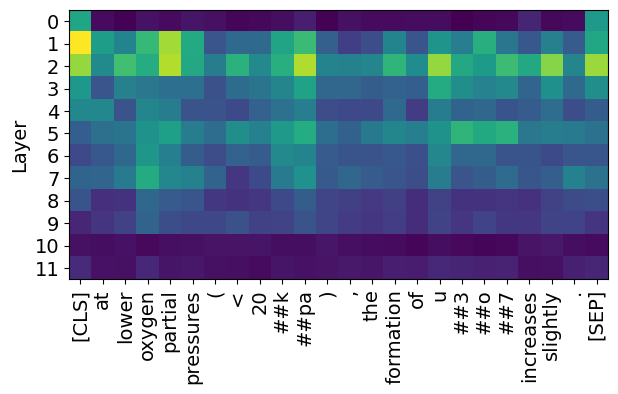

In [79]:
attn_img = torch.stack([attn[0,:,:,0].sum(dim=0) for attn in attention]).detach().numpy()
plt.imshow(attn_img)
plt.xticks(range(len(tokens)), tokens, rotation=90)
plt.yticks(range(len(attn_img)))
plt.ylabel('Layer')
plt.tight_layout()
# plt.savefig('attention_before_training.png', dpi=300, transparent=True)